In [17]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [18]:
data = load_wine()

X_train, X_test, y_train, y_test = train_test_split ( data.data, data.target, test_size = 0.3)

model = RandomForestClassifier ( n_estimators= 10)

model.fit ( X_train, y_train)
y_pred = model.predict (X_test)
accuracy_score ( y_pred, y_test)

0.9814814814814815

특징별 중요도 시각화

In [11]:
type(data)

sklearn.utils.Bunch

In [20]:
import matplotlib.pyplot as plt
import numpy as np

 1) flavanoids                     0.244821
 2) alcohol                        0.197439
 3) color_intensity                0.157606
 4) proline                        0.147433
 5) od280/od315_of_diluted_wines   0.091329
 6) total_phenols                  0.040428
 7) malic_acid                     0.034063
 8) alcalinity_of_ash              0.033187
 9) proanthocyanins                0.016821
10) magnesium                      0.014176
11) hue                            0.012073
12) ash                            0.007873
13) nonflavanoid_phenols           0.002751


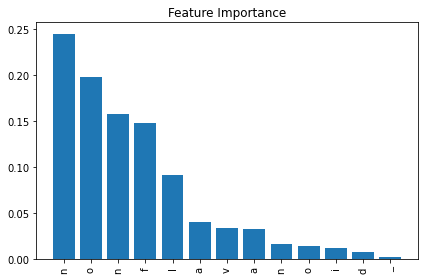

In [23]:
feat_labels = data.feature_names 
importances = model.feature_importances_
indices = np.argsort (importances) [::-1]


for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]) )
#   feat_label_rank[] =feat_labels[indices[f]]


plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices[f]], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

특징별 중요도의 순서내용과 표가 맞지 않는 걸 보니, 매번 돌릴때마다 결과가 달라지는게 느껴짐

머신러닝 교과서 코드 참조
https://github.com/rickiepark/python-machine-learning-book-2nd-edition/blob/master/code/ch04/ch04.ipynb



In [13]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel( model, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('이 임계 조건을 만족하는 샘플의 수:', X_selected.shape[1])


이 임계 조건을 만족하는 샘플의 수: 4


In [14]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) color_intensity                0.187122
 2) od280/od315_of_diluted_wines   0.178813
 3) flavanoids                     0.163878
 4) alcohol                        0.159416
